<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Seperate x, y and make dummy vatriables 

In [4]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No_phone', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaymentMethod_Bank_transfer',
       'PaymentMethod_Credit_card', 'PaymentMethod_Electronic_check',
       'Pa

In [5]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Female', 'MultipleLines_No_phone', 'InternetService_No', 'OnlineSecurity_No_internet',
         'OnlineBackup_No_internet', 'DeviceProtection_No_internet', 'TechSupport_No_internet', 
         'StreamingTV_No_internet', 'StreamingMovies_No_internet', 'Contract_One_year',
         'PaymentMethod_Bank_transfer'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month_to_month', 'Contract_Two_year',
       'PaymentMethod_Credit_card', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [6]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

## Baseline model

__which evaluation metric is most essential for this project ?__ <br>
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$

0 - not churned
1 - churned.
We want to predict churned (1) as accurately as possible. So, __FN__ is bad for us. Meaning model predict not churn but the customer actually churned. Then __recall__ is the important score for us. When evaluating between models we should pay more attention to recall and try to reduce FN as much as possible.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import plotly.graph_objs as go
import plotly.offline as py#visualization
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)#visualization

Using TensorFlow backend.


In [8]:
def results(model, X_1, X_train_1, y_train_1, X_test_1, y_test_1, cf, notfig):
    # fit model and get predictions 
    model.fit(X_train_1, y_train_1)
    #predictions
    prediction_train = model.predict(X_train_1)
    prediction_test = model.predict(X_test_1)
    
    print('-'*90)
    print(model)
    
    print('-'*90)
    print('Training accuracy Score:', accuracy_score(y_train_1, prediction_train))
    print('Model accuracy Score:', accuracy_score(y_test_1, prediction_test))

    print('-'*90)
    print('Classification Matrix:')
    print(classification_report(y_test_1, prediction_test))    
    
    print('-'*90)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test_1, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    conf_matrix = confusion_matrix(y_test_1, prediction_test)
    z=[list(conf_matrix[i]) for i in [1,0]]
    x = ["not Churn", "churn"]
    y = ["Churn", "not churn"]
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]
    # set up figure 
    fig1 = ff.create_annotated_heatmap(z, x=["not Churn", "churn"], y=["Churn", "not churn"],
                                      annotation_text=z_text, colorscale='Viridis')
    fig1.update_layout( autosize=False, width=350, height=350,
        yaxis=dict( title_text="Actual", tickmode="array", titlefont=dict(size=21)),
        xaxis=dict(title_text="Predics", tickmode="array", titlefont=dict(size=21)),
        )
    fig1.show()    

    #roc_auc_score
    if notfig != 'fig2':
        # 
        y_score_test = model.decision_function(X_test_1)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test_1, y_score_test)
        test_model_roc_auc = roc_auc_score(y_test_1,y_score_test) 

        y_score_train = model.decision_function(X_train_1)
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train_1, y_score_train)
        train_model_roc_auc = roc_auc_score(y_train_1,y_score_train) 

        #plot roc curve          #rgb(31, 119, 180)   #rgb(22, 96, 167)
        trace1 = go.Scatter(x = train_fpr,y = train_tpr,
                            name = "Train_Roc : " + str(train_model_roc_auc),
                            line = dict(color = ('blue'),width = 2))
        trace2 = go.Scatter(x = test_fpr,y = test_tpr,
                            name = "test_Roc : " + str(test_model_roc_auc),
                            line = dict(color = ('orange'),width = 2))
        trace3 = go.Scatter(x = [0,1],y=[0,1],
                            line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                            dash = 'dot'))
        data2 = [trace1,trace2,trace3]
        fig2 = go.Figure(data=data2)
        fig2.update_layout( autosize=False, width=700, height=500, title='Receiver operating characteristic',
            yaxis=dict(title_text="True positive rate"),
            xaxis=dict(title_text="False positive rate"),
            )
        fig2.show()

    #best coefficients and important features
    if notfig != 'fig3':
        #
        if   cf == "coefficients" :
            coefficients  = pd.DataFrame(model.coef_.ravel())
        elif cf == "features" :
            coefficients  = pd.DataFrame(model.feature_importances_)

        cols    = [i for i in X_1.columns]
        column_df     = pd.DataFrame(cols)
        coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                                  right_index= True, how = "left"))
        coef_sumry.columns = ["coefficients","features"]
        coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
        trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6,color = "black")))
        data = [trace4]
        fig3  = go.Figure(data=data)
        fig3.update_layout(title_text='important '+cf)
        #fig.update_xaxes(tickangle=45)
        fig3.show()

In [9]:
#model_performances
def output_tracer(model_performances, metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer
def plot_tracers(model_performances):
    layout = go.Layout(dict(title = "Model performances",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "metric",
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            margin = dict(l = 250),
                            height = 780
                           )
                      )


    trace1  = output_tracer(model_performances, "Accuracy_score","#6699FF")
    trace2  = output_tracer(model_performances, 'Recall_score',"red")
    trace3  = output_tracer(model_performances, 'Precision',"#33CC99")
    trace4  = output_tracer(model_performances, 'f1_score',"lightgrey")

    data = [trace1,trace2,trace3,trace4]
    fig = go.Figure(data=data,layout=layout)
    fig.show()


In [10]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 

    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df


In [11]:
# make a test-train split
split_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=42) #stratify=y

In [12]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (4711, 30)(4711,)
Test dataset: (2321, 30)(2321,)


In [13]:
#scale features 
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
# Let's create a baseline model for all models. Let's statr with as minimum amount of parameters as possible 

# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train,X_test,y_train,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train,X_test,y_train,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train,X_test,y_train,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model4 = model_report(rfc,X_train,X_test,y_train,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model5 = model_report(svc,X_train,X_test,y_train,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model6 = model_report(xgc,X_train,X_test,y_train,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.800517,0.544262,0.642166,0.589175,0.718069
1,Decision Tree,0.720810,0.493443,0.470313,0.481600,0.647656
2,KNN Classifier,0.764757,0.552459,0.552459,0.552459,0.696452
3,Random Forest Classifier,0.767342,0.431148,0.576754,0.493433,0.659174
4,SVM Classifier Linear,0.795778,0.532787,0.632296,0.578292,0.711163
5,XGBoost Classifier,0.807411,0.527869,0.669439,0.590284,0.717470


### Improving model with SMOTE

In [15]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_smote).value_counts())

1    3452
0    3452
dtype: int64


In [16]:
# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train_smote,X_test,y_train_smote,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model4 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model5 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model6 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.750969,0.804918,0.516842,0.629487,0.768327
1,Decision Tree,0.704438,0.521311,0.446629,0.481089,0.645518
2,KNN Classifier,0.698837,0.680328,0.451578,0.542838,0.692882
3,Random Forest Classifier,0.776820,0.555738,0.578498,0.566890,0.705689
4,SVM Classifier Linear,0.711762,0.811475,0.471878,0.596745,0.743844
5,XGBoost Classifier,0.782852,0.703279,0.570479,0.629956,0.757250


with SMOTE we can see that the model accuray score reduces a little but the __recall__ improves considerablly. As recall is the main evaluation metric of interest for churn dataset it is better to use SMOTE. 
From the evaluation comparison above clearly Logistic regression and SVM classifiers give the best performance and worth exploring further. However, since XGboots is been known to perform well with the correct set of hyper parameters let's explot XGboost further as well. 

## Improving model accuracy 

In [17]:
def get_pl(name, classifier, parms, score='recall'):
    # function
    pl = Pipeline([(name, classifier)])

    gs = GridSearchCV(pl, parms, scoring=score, cv=5, n_jobs=-1)

    gs.fit(X_train_smote, y_train_smote)

    best_parameters = gs.best_params_
    print("Grid Search found the following optimal parameters: ")
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

    if score == 'accuracy':
        # optimize for accuracy
        training_preds = gs.predict(X_train_smote)
        val_preds = gs.predict(X_test)
        training_accuracy = accuracy_score(y_train_smote, training_preds)
        val_accuracy = accuracy_score(y_test, val_preds)

        print("")
        print("Training accuracy : {:.4}%".format(training_accuracy * 100))
        print("Validation accuracy: {:.4}%".format(val_accuracy * 100))
    elif score == 'recall':
        # optimize for recall
        training_preds = gs.predict(X_train_smote)
        val_preds = gs.predict(X_test)
        training_recall = recall_score(y_train_smote, training_preds)
        val_recall = recall_score(y_test, val_preds)

        print("")
        print("Training recall: {:.4}%".format(training_recall * 100))
        print("Validation recall: {:.4}%".format(val_recall * 100))
    return None

### Logistic Regression

Following parameters maybe set and changed to get better accuracy 

* "penalty": 'l2' => Churn dataset have lot of multicoliniarity
* 'C': [100, 10, 1, 0.1, 0.01, 0.001]  => have to test strenth of regularization is best
* 'fit_intercept': True, False
* 'random_state': [11],
* 'solver': 'liblinear',
* 'max_iter': [200]


In [18]:
# call function 
param_grid = {    
    "logit__penalty": ['l1','l2'],
    'logit__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logit__fit_intercept': [True, False],
    'logit__random_state': [11],
    'logit__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logit__max_iter': [200],
    'logit__intercept_scaling': [10, 1, 0.1, 0.001],
    'logit__class_weight': ['balanced', None],
}

#get_pl('logit', LogisticRegression(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
logit__C: 100
logit__class_weight: 'balanced'
logit__fit_intercept: False
logit__intercept_scaling: 10
logit__max_iter: 200
logit__penalty: 'l1'
logit__random_state: 11
logit__solver: 'liblinear'

Training recall: 90.73%
Validation recall: 88.36%
"""

"\nGrid Search found the following optimal parameters: \nlogit__C: 100\nlogit__class_weight: 'balanced'\nlogit__fit_intercept: False\nlogit__intercept_scaling: 10\nlogit__max_iter: 200\nlogit__penalty: 'l1'\nlogit__random_state: 11\nlogit__solver: 'liblinear'\n\nTraining recall: 90.73%\nValidation recall: 88.36%\n"

In [19]:
# after Gridsearch with recall for scoring
logreg_1 = LogisticRegression(C = 100 , class_weight = 'balanced', fit_intercept = False , 
                              intercept_scaling = 10 , max_iter = 200 , penalty = 'l1' ,
                              random_state = 11 , solver = 'liblinear')
                            
# model results
results(logreg_1, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', None)

------------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=10, l1_ratio=None,
                   max_iter=200, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=11, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7627462340672074
Model accuracy Score: 0.6785868160275743
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1711
           1       0.44      0.88      0.59       610

    accuracy                           0.68      2321
   macro avg       0.69      0.74      0.66      2321
weighted av

In [20]:
# call function 
param_grid = {    
    "logit__penalty": ['l1','l2'],
    'logit__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logit__fit_intercept': [True, False],
    'logit__random_state': [11],
    'logit__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logit__max_iter': [200],
    'logit__intercept_scaling': [10, 1, 0.1, 0.001],
    'logit__class_weight': ['balanced', None],
}

#get_pl('logit', LogisticRegression(), param_grid, 'accuracy')

"""
Grid Search found the following optimal parameters: 
logit__C: 1
logit__fit_intercept: True
logit__max_iter: 200
logit__penalty: 'l2'
logit__random_state: 11
logit__solver: 'liblinear'

Training accuracy : 77.89%
Validation accuracy: 75.74%
"""

"\nGrid Search found the following optimal parameters: \nlogit__C: 1\nlogit__fit_intercept: True\nlogit__max_iter: 200\nlogit__penalty: 'l2'\nlogit__random_state: 11\nlogit__solver: 'liblinear'\n\nTraining accuracy : 77.89%\nValidation accuracy: 75.74%\n"

In [21]:
# after Gridsearch with recall for scoring
logreg_1 = LogisticRegression(C = 1 , class_weight = 'balanced', fit_intercept = True , 
                              intercept_scaling = 10 , max_iter = 200 , penalty = 'l2' ,
                              random_state = 11 , solver = 'newton-cg')
# model results
results(logreg_1, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', None)

------------------------------------------------------------------------------------------
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=10, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=11, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7785341830822712
Model accuracy Score: 0.7514002585092633
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1711
           1       0.52      0.80      0.63       610

    accuracy                           0.75      2321
   macro avg       0.72      0.77      0.72      2321
weighted avg  

### SVM

Following parameters maybe set and changed to get better accuracy 

* kernal: [‘linear’, ‘poly’, ‘rbf’]
* C:  [100, 10, 1, 0.1, 0.01, 0.001] => how soft is the soft margin. low C means errors matter less
* degree: [2, 3] => highest order of poly kernal. ignored for other kernals 
* 'tol': [1e-4] => stopping criterion increased a little here



In [22]:
# Pipeline par grid for SVC
param_grid = {
    'svm__C': [100, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__degree': [2, 3, 4],
    'svm__gamma': ['auto', 'scale'],
    'svm__coef0': [10.0, 1.0, 0.1, 0.001],
    'svm__shrinking': [True, False], 
    'svm__class_weight': ['balanced', None],
    'svm__max_iter': [200],
    'svm__random_state': [42],
}

#get_pl('svm', SVC(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
svm__C: 0.01
svm__class_weight: 'balanced'
svm__coef0: 1.0
svm__degree: 2
svm__gamma: 'scale'
svm__kernel: 'sigmoid'
svm__max_iter: 200
svm__random_state: 42
svm__shrinking: True

Training recall: 94.52%
Validation recall: 94.92%
"""

"\nGrid Search found the following optimal parameters: \nsvm__C: 0.01\nsvm__class_weight: 'balanced'\nsvm__coef0: 1.0\nsvm__degree: 2\nsvm__gamma: 'scale'\nsvm__kernel: 'sigmoid'\nsvm__max_iter: 200\nsvm__random_state: 42\nsvm__shrinking: True\n\nTraining recall: 94.52%\nValidation recall: 94.92%\n"

In [46]:
# accuracy matric of the best set of parameters   kernel ='rbf', C=100, degree= 2,  tol = 0.0001, gamma = 'auto'
clf_svm_1 = SVC(C = 0.01, class_weight = 'balanced', coef0 = 1.0, degree = 2, gamma = 'scale', 
                kernel = 'sigmoid', max_iter = 200, random_state = 42, shrinking = True)

results(clf_svm_1, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', 'fig3')

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



------------------------------------------------------------------------------------------
SVC(C=0.01, cache_size=200, class_weight='balanced', coef0=1.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='sigmoid',
    max_iter=200, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.5589513325608343
Model accuracy Score: 0.3735458853942266
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.17      0.29      1711
           1       0.29      0.94      0.44       610

    accuracy                           0.37      2321
   macro avg       0.59      0.56      0.36      2321
weighted avg       0.74      0.37      0.33      2321

--------------------------------------------------

In [24]:
# Pipeline par grid for SVC with accuracy measure
param_grid = {    
    'svm__C': [100, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__degree': [2, 3, 4],
    'svm__gamma': ['auto', 'scale'],
    'svm__coef0': [10.0, 1.0, 0.1, 0.001],
    'svm__shrinking': [True, False], 
    'svm__class_weight': ['balanced', None],
    'svm__max_iter': [200],
    'svm__random_state': [42],
}

#get_pl('svm', SVC(), param_grid, 'accuracy')
"""
Grid Search found the following optimal parameters: 
svm__C: 100
svm__class_weight: None
svm__coef0: 10.0
svm__degree: 2
svm__gamma: 'auto'
svm__kernel: 'sigmoid'
svm__max_iter: 200
svm__random_state: 42
svm__shrinking: True

Training accuracy : 74.74%
Validation accuracy: 67.82%
"""

"\nGrid Search found the following optimal parameters: \nsvm__C: 100\nsvm__class_weight: None\nsvm__coef0: 10.0\nsvm__degree: 2\nsvm__gamma: 'auto'\nsvm__kernel: 'sigmoid'\nsvm__max_iter: 200\nsvm__random_state: 42\nsvm__shrinking: True\n\nTraining accuracy : 74.74%\nValidation accuracy: 67.82%\n"

In [25]:
# accuracy matric of the best set of parameters  
clf_svm_1 = SVC(C = 100, class_weight = None, coef0 = 10.0, degree = 2, gamma = 'auto', 
kernel = 'sigmoid', max_iter = 200, random_state = 42, shrinking = True)

results(clf_svm_1, X, X_train_smote, y_train_smote, X_test, y_test,'coefficients', 'fig3')

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



------------------------------------------------------------------------------------------
SVC(C=100, cache_size=200, class_weight=None, coef0=10.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='sigmoid',
    max_iter=200, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7501448435689455
Model accuracy Score: 0.6738474795346834
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1711
           1       0.44      0.88      0.59       610

    accuracy                           0.67      2321
   macro avg       0.69      0.74      0.66      2321
weighted avg       0.80      0.67      0.69      2321

---------------------------------------------------------

In [26]:
# accuracy matric of the best set of parameters  
clf_svm_1 = SVC(kernel ='linear', C=0.001, tol = 0.0001, gamma = 'auto')

results(clf_svm_1, X, X_train_smote, y_train_smote, X_test, y_test,'coefficients', 'fig3')

------------------------------------------------------------------------------------------
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7662224797219004
Model accuracy Score: 0.7264110297285653
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1711
           1       0.49      0.81      0.61       610

    accuracy                           0.73      2321
   macro avg       0.70      0.75      0.70      2321
weighted avg       0.80      0.73      0.74      2321

-------------------------------------------------------

### XGBoost
parameters: 
* learning_rate: must be set to 1 when training random forest regression. controls the contribution of estimators in the final combination. 
* max_depth:  depth of a given tree 
* min_child_weight': Minimum sum of instance weight needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.
* subsample: Subsample ratio of the training instances.                 
* n_estimator: The number of trees in the forrest.

In [27]:
param_grid = {    
     'xgb__booster': ['gbtree'],
     'xgb__subsample': [0.2, 0.4, 0.8, 0.9],
     'xgb__colsample_bynode': [0.2, 0.4, 0.8, 0.9],
     'xgb__num_boost_round': [1],
     'xgb__random_state': [42],
     'xgb__eta': [1],
     'xgb__max_depth': [5, 9, 15, 20],
     'xgb__min_child_weight': [5, 10, 18, 50],
     'xgb__n_estimators': [5, 30, 100, 250],
     'xgb__objective': ['binary:logistic'],
}

#get_pl('xgb', XGBClassifier(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
xgb__booster: 'gbtree'
xgb__colsample_bynode: 0.4
xgb__eta: 1
xgb__max_depth: 5
xgb__min_child_weight: 50
xgb__n_estimators: 5
xgb__num_boost_round: 1
xgb__objective: 'binary:logistic'
xgb__random_state: 42
xgb__subsample: 0.2

Training recall: 79.35%
Validation recall: 75.9%
"""

"\nGrid Search found the following optimal parameters: \nxgb__booster: 'gbtree'\nxgb__colsample_bynode: 0.4\nxgb__eta: 1\nxgb__max_depth: 5\nxgb__min_child_weight: 50\nxgb__n_estimators: 5\nxgb__num_boost_round: 1\nxgb__objective: 'binary:logistic'\nxgb__random_state: 42\nxgb__subsample: 0.2\n\nTraining recall: 79.35%\nValidation recall: 75.9%\n"

In [28]:
# Create XBoost classifer object
clf_xgb = XGBClassifier(booster = 'gbtree', colsample_bynode = 0.4, eta = 1, max_depth = 5, 
                        min_child_weight = 50, n_estimators = 5, num_boost_round = 1, subsample = 0.2, 
                        objective = 'binary:logistic', random_state = 42)
results(clf_xgb, X, X_train_smote, y_train_smote, X_test, y_test, 'features', 'fig2')

#Plot features importances
#imp = pd.Series(data=clf_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
#plt.figure(figsize=(10,12))
#plt.title("Feature importance")
#ax = sns.barplot(y=imp.index, x=imp.values,palette="coolwarm", orient='h')

------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.4, colsample_bytree=1, eta=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=50, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, num_boost_round=1, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.2, verbosity=1)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.779837775202781
Model accuracy Score: 0.7462300732442912
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1711
           

In [29]:
param_grid = {    
     'xgb__booster': ['gbtree'],
     'xgb__subsample': [0.2, 0.4, 0.8, 0.9],
     'xgb__colsample_bynode': [0.2, 0.4, 0.8, 0.9],
     'xgb__num_boost_round': [1],
     'xgb__random_state': [42],
     'xgb__eta': [1],
     'xgb__max_depth': [5, 9, 15, 20],
     'xgb__min_child_weight': [5, 10, 18, 50],
     'xgb__n_estimators': [5, 30, 100, 250],
     'xgb__objective': ['binary:logistic'],
}

#get_pl('xgb', XGBClassifier(), param_grid, 'accuracy')
"""
Grid Search found the following optimal parameters: 
xgb__booster: 'gbtree'
xgb__colsample_bynode: 0.8
xgb__eta: 1
xgb__max_depth: 20
xgb__min_child_weight: 5
xgb__n_estimators: 100
xgb__num_boost_round: 1
xgb__objective: 'binary:logistic'
xgb__random_state: 42
xgb__subsample: 0.8

Training accuracy : 95.9%
Validation accuracy: 76.86%
"""

"\nGrid Search found the following optimal parameters: \nxgb__booster: 'gbtree'\nxgb__colsample_bynode: 0.8\nxgb__eta: 1\nxgb__max_depth: 20\nxgb__min_child_weight: 5\nxgb__n_estimators: 100\nxgb__num_boost_round: 1\nxgb__objective: 'binary:logistic'\nxgb__random_state: 42\nxgb__subsample: 0.8\n\nTraining accuracy : 95.9%\nValidation accuracy: 76.86%\n"

In [30]:
# Create XBoost classifer object
clf_xgb = XGBClassifier( booster = 'gbtree', colsample_bynode = 0.8, 
                        eta = 1, max_depth = 20, min_child_weight = 5, 
                        n_estimators = 100, num_boost_round = 1, 
                        random_state = 42, subsample = 0.8, 
                        objective = 'binary:logistic')
results(clf_xgb, X, X_train_smote, y_train_smote, X_test, y_test, 'features', 'fig2')

#Plot features importances
#imp = pd.Series(data=clf_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
#plt.figure(figsize=(10,12))
#plt.title("Feature importance")
#ax = sns.barplot(y=imp.index, x=imp.values,palette="coolwarm", orient='h')

------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.8, colsample_bytree=1, eta=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_boost_round=1, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, verbosity=1)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.958864426419467
Model accuracy Score: 0.7716501507970702
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1711
         

### Random Forrest

parameters: 
* criterion':  loss function. gini  entropy
* n_estimator: The number of trees in the forrest.
* max_depth:  depth of a given tree 
* max_features: every split takes only subset of features. Thus, this will pick how many number of features 
               are tacken at every split [auto, none, sqrt, log2, 0.9....etc]
* min_samples_leaf: The minimum number of samples in newly created tree. 
* oob_score: out of bag score improves accuracy. 

In [31]:
# Pipeline par grid for Random Forrest
# 'rf__max_samples': [5, 10, 15, 20, 50],
param_grid = {    
    'rf__n_estimators': [5,10, 50, 100, 250],
    'rf__criterion': ['gini','entropy'],
    'rf__max_depth': [5, 9, 15, 20, 50],
    'rf__min_samples_split': [6, 10, 20, 50, 100],
    'rf__min_samples_leaf': [4, 6, 10, 20],
    'rf__min_weight_fraction_leaf': [0.0, 0.2, 0.5],
    'rf__max_features':['auto', 'log2', 0.9, 0.5],
    'rf__bootstrap': [True],
    'rf__oob_score': [True],
    'rf__random_state': [42],
    'rf__class_weight': [ 'balanced', 'balanced_subsample', None],
    'rf__n_jobs': [-1],
}

#get_pl('rf', RandomForestClassifier(), param_grid, 'recall')
"""
Grid Search found the following optimal parameters: 
rf__bootstrap: True
rf__class_weight: 'balanced'
rf__criterion: 'gini'
rf__max_depth: 5
rf__max_features: 0.9
rf__min_samples_leaf: 4
rf__min_samples_split: 6
rf__min_weight_fraction_leaf: 0.2
rf__n_estimators: 5
rf__n_jobs: -1
rf__oob_score: True
rf__random_state: 42

Training recall: 92.56%
Validation recall: 87.38%
"""

"\nGrid Search found the following optimal parameters: \nrf__bootstrap: True\nrf__class_weight: 'balanced'\nrf__criterion: 'gini'\nrf__max_depth: 5\nrf__max_features: 0.9\nrf__min_samples_leaf: 4\nrf__min_samples_split: 6\nrf__min_weight_fraction_leaf: 0.2\nrf__n_estimators: 5\nrf__n_jobs: -1\nrf__oob_score: True\nrf__random_state: 42\n\nTraining recall: 92.56%\nValidation recall: 87.38%\n"

In [32]:
# let's try the best random forrest 
clf_rf = RandomForestClassifier(bootstrap= True ,class_weight= 'balanced' ,criterion= 'gini', 
                                max_depth= 5 , max_features= 0.9, min_samples_leaf= 4, 
                                min_samples_split= 6, min_weight_fraction_leaf= 0.2, n_estimators= 5, 
                                n_jobs= -1, oob_score= True, random_state= 42)
#clf_rf = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
#                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
results(clf_rf, X, X_train_smote, y_train_smote, X_test, y_test, 'features', 'fig2')

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.9,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=6, min_weight_fraction_leaf=0.2,
                       n_estimators=5, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.7507242178447276
Model accuracy Score: 0.6376561826798793
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1711
           1       0.41   

In [33]:
# Pipeline par grid for Random Forrest
# 'rf__max_samples': [5, 10, 15, 20, 50],
param_grid = {    
    'rf__n_estimators': [5,10, 50, 100, 250],
    'rf__criterion': ['gini','entropy'],
    'rf__max_depth': [5, 9, 15, 20, 50],
    'rf__min_samples_split': [6, 10, 20, 50, 100],
    'rf__min_samples_leaf': [4, 6, 10, 20],
    'rf__min_weight_fraction_leaf': [0.0, 0.2, 0.5],
    'rf__max_features':['auto', 'log2', 0.9, 0.5],
    'rf__bootstrap': [True],
    'rf__oob_score': [True],
    'rf__random_state': [42],
    'rf__class_weight': [ 'balanced', 'balanced_subsample', None],
    'rf__n_jobs': [-1],
}

#get_pl('rf', RandomForestClassifier(), param_grid, 'accuracy')
"""
Grid Search found the following optimal parameters: 
rf__bootstrap: True
rf__class_weight: 'balanced_subsample'
rf__criterion: 'entropy'
rf__max_depth: 20
rf__max_features: 0.9
rf__min_samples_leaf: 4
rf__min_samples_split: 10
rf__min_weight_fraction_leaf: 0.0
rf__n_estimators: 100
rf__n_jobs: -1
rf__oob_score: True
rf__random_state: 42

Training accuracy : 94.03%
Validation accuracy: 77.64%

"""

"\nGrid Search found the following optimal parameters: \nrf__bootstrap: True\nrf__class_weight: 'balanced_subsample'\nrf__criterion: 'entropy'\nrf__max_depth: 20\nrf__max_features: 0.9\nrf__min_samples_leaf: 4\nrf__min_samples_split: 10\nrf__min_weight_fraction_leaf: 0.0\nrf__n_estimators: 100\nrf__n_jobs: -1\nrf__oob_score: True\nrf__random_state: 42\n\nTraining accuracy : 94.03%\nValidation accuracy: 77.64%\n\n"

In [34]:
# let's try the best random forrest 
clf_rf = RandomForestClassifier(bootstrap =  True,class_weight =  'balanced_subsample', 
                                criterion =  'entropy', max_depth =  20,max_features =  0.9,
                                min_samples_leaf =  4, min_samples_split =  10, 
                                min_weight_fraction_leaf =  0.0,n_estimators =  100,
                                n_jobs =  -1, oob_score =  True, random_state =  42)
#clf_rf = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
#                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
results(clf_rf, X, X_train_smote, y_train_smote, X_test, y_test, 'features', 'fig2')

------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=20, max_features=0.9,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.9424971031286211
Model accuracy Score: 0.7733735458853942
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1711
         

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



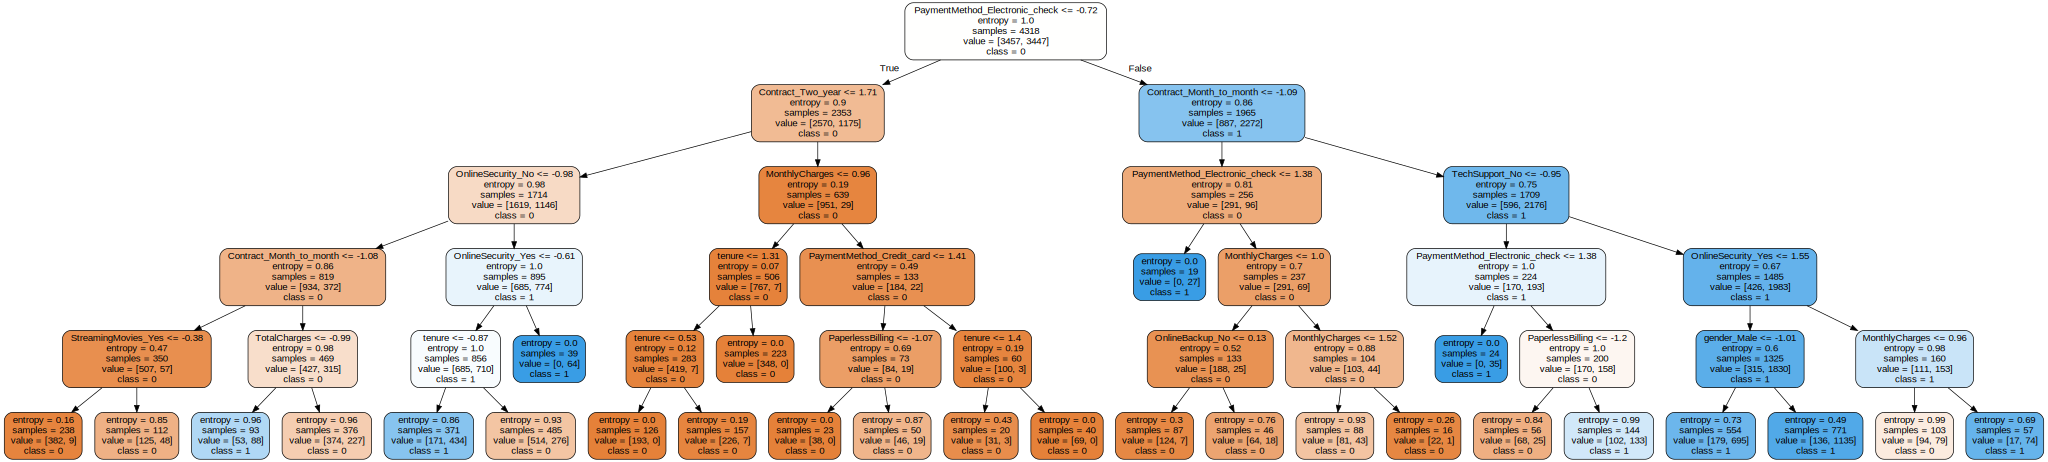

In [35]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
from IPython.display import SVG,display
from graphviz import Source

clf_rf = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
clf_rf.fit(X_train_smote, y_train_smote)
estimated_tree = clf_rf.estimators_[9]
graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                    rounded=True,proportion = False,
                        feature_names = X.columns, 
                        precision  = 2,
                        class_names=["0","1"],
                        filled = True))
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('img/rf.png')
#Image(graph.create_png())
display(graph)

## model comparison after parameter optimization

In [47]:
name = "Logistic Regression"
#logit = LogisticRegression(C=10, fit_intercept= False, max_iter= 200, penalty= 'l2', 
#                              random_state= 11, solver= 'liblinear')
#logit = LogisticRegression(C=1, fit_intercept= True, max_iter= 200, penalty= 'l2', 
#                              random_state= 11, solver= 'liblinear')
logit = LogisticRegression(C = 1 , class_weight = 'balanced', fit_intercept = True , 
                              intercept_scaling = 10 , max_iter = 200 , penalty = 'l2' ,
                              random_state = 11 , solver = 'newton-cg')
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
#rfc = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
#                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
#rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
#                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
rfc = RandomForestClassifier(bootstrap= True ,class_weight= 'balanced' ,criterion= 'gini', 
                                max_depth= 5 , max_features= 0.9, min_samples_leaf= 4, 
                                min_samples_split= 6, min_weight_fraction_leaf= 0.2, n_estimators= 5, 
                                n_jobs= -1, oob_score= True, random_state= 42)
model2 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
#svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
svc  = SVC(C = 100, class_weight = None, coef0 = 10.0, degree = 2, gamma = 'auto', 
           kernel = 'sigmoid', max_iter = 200, random_state = 42, shrinking = True)
model3 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
#xgc = XGBClassifier(learning_rate=1, max_depth=3,min_child_weight=10,n_estimators=5,subsample= 0.3)
#xgc = XGBClassifier(eta=1, max_depth=3,min_child_weight=18,n_estimators=5,subsample= 0.3)
xgc = XGBClassifier(booster = 'gbtree', colsample_bynode = 0.4, eta = 1, max_depth = 5,
                    min_child_weight = 50, n_estimators = 5, num_boost_round = 1, subsample = 0.2, 
                    objective = 'binary:logistic', random_state = 42)
model4 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.751400,0.804918,0.517387,0.629891,0.768619
1,Random Forest Classifier,0.637656,0.873770,0.410948,0.558993,0.713624
2,SVM Classifier Linear,0.673847,0.880328,0.439803,0.586565,0.740281
3,XGBoost Classifier,0.746230,0.777049,0.511327,0.616786,0.756146


## Feature engineering
Can we change or remove columns to remove colliniarity and improve accuracy 

### MLE

In [37]:
import statsmodels.api as sm
# statsmodels has inbuilt MLE methods and easy to get the most important features based on p-values
# Create intercept term required for sm.Logit, see documentation for more information
X_sm = X
y_sm = y
X_sm = sm.add_constant(X_sm)

# Fit model
logit_model = sm.Logit(y_sm, X_sm)

# Get results of the fit
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 21


C:\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning:

invalid value encountered in sqrt

C:\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

C:\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

C:\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.2845
Time:                        22:25:15   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2818      0.232     -5.528      0.000      -1.736      -0.827
SeniorCitizen                      0.2168      0.085      2.564      0.010       0.051       0.382
Partner                           -0.0004      0.078     -0.005      0.996      -0.153       0.152
Dependents                        -0.1485      0.090     -1.655      0.098      -0.324       0.027
tenure                            -0.0606      0.006     -9.716      0.000      -0.073      -0.048
PhoneService                       0.2638   3.08e+06   8.56e-08      1.000   -6.04e+06    6.04e+06
PaperlessBilling                   0.3424      0.074      4.596      0.000       0.196       0.488
MonthlyCharges                    -0.0403      0.032     -1.270      0.204      -0.103       0.022
TotalCharges                       0.0003   7.06e-05      4.657      0.000       0.000       0.000
gender_Male                       -0.0218      0.065     -0.337      0.736      -0.149       0.105
MultipleLines_No                  -0.0923   3.12e+06  -2.96e-08      1.000   -6.12e+06    6.12e+06
MultipleLines_Yes                  0.3561   3.06e+06   1.16e-07      1.000      -6e+06       6e+06
InternetService_DSL               -0.0900    5.4e+06  -1.67e-08      1.000   -1.06e+07    1.06e+07
InternetService_Fiber_optic        1.6575   5.44e+06   3.05e-07      1.000   -1.07e+07    1.07e+07
OnlineSecurity_No                  0.3696    3.1e+06   1.19e-07      1.000   -6.07e+06    6.07e+06
OnlineSecurity_Yes                 0.1642    3.2e+06   5.13e-08      1.000   -6.27e+06    6.27e+06
OnlineBackup_No                    0.2525   2.08e+06   1.21e-07      1.000   -4.08e+06    4.08e+06
OnlineBackup_Yes                   0.2786   1.94e+06   1.44e-07      1.000    -3.8e+06     3.8e+06
DeviceProtection_No                0.4726   2.56e+06   1.84e-07      1.000   -5.02e+06    5.02e+06
DeviceProtection_Yes               0.6200   2.85e+06   2.17e-07      1.000   -5.59e+06    5.59e+06
TechSupport_No                     0.4941        nan        nan        nan         nan         nan
TechSupport_Yes                    0.3136        nan        nan        nan         nan         nan
StreamingTV_No                     0.1373   2.68e+06   5.12e-08      1.000   -5.26e+06    5.26e+06
StreamingTV_Yes                    0.7278   2.68e+06   2.71e-07      1.000   -5.26e+06    5.26e+06
StreamingMovies_No                 0.1502   2.44e+06   6.15e-08      1.000   -4.79e+06    4.79e+06
StreamingMovies_Yes                0.7495   2.44e+06   3.07e-07      1.000   -4.79e+06    4.79e+06
Contract_Month_to_month            0.6608      0.108      6.142      0.000       0.450       0.872
Contract_Two_year                 -0.6963      0.177     -3.944      0.000      -1.042      -0.350
PaymentMethod_Credit_card         -0.0878      0.114     -0.770      0.442      -0.311       0.136
PaymentMethod_Electronic_check     0.3045      0.094      3.222      0.00

In [38]:
X_sm = X_sm.drop(['gender_Male', 'Partner', 'Dependents', 'PhoneService', 'MonthlyCharges', 
             'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber_optic',
             'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
             'DeviceProtection_No', 'DeviceProtection_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
             'StreamingMovies_No', 'StreamingMovies_Yes', 'PaymentMethod_Credit_card', 
             'PaymentMethod_Mailed_check'], axis = 1 )
display(X_sm.columns)

Index(['const', 'SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'TechSupport_No', 'TechSupport_Yes', 'Contract_Month_to_month',
       'Contract_Two_year', 'PaymentMethod_Electronic_check'],
      dtype='object')

In [39]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm,test_size=split_size,random_state=42)
smote = SMOTE()
X_sm_train_smote, y_sm_train_smote = smote.fit_sample(X_sm_train, y_sm_train) 
print(pd.Series(y_train_smote).value_counts())

1    3452
0    3452
dtype: int64


In [40]:
name = "Random Forest Classifier"
rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
model1 = model_report(rfc,X_sm_train_smote,X_sm_test,y_sm_train_smote,y_sm_test,name)

name = "SVM Classifier Linear"
#svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
svc  = SVC(kernel ='linear', C=0.001, tol = 0.001, gamma = 'auto')
model2 = model_report(svc,X_sm_train_smote,X_sm_test,y_sm_train_smote,y_sm_test,name)


#concat all models ,model4
model_performances = pd.concat([model1,model2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

#plot_tracers(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Random Forest Classifier,0.761310,0.60000,0.541420,0.569207,0.709410
1,SVM Classifier Linear,0.716071,0.82623,0.476821,0.604679,0.751513


### Recursive feature elimination

In [41]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month_to_month',
       'Contract_Two_year', 'PaymentMethod_Credit_card',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check'],
      dtype='object')

In [42]:
from sklearn.feature_selection import RFE

logit = LogisticRegression(solver='lbfgs')

rfe = RFE(logit,10)
rfe = rfe.fit(X_train_smote, y_train_smote.ravel()) # .values.ravel()

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : list(X.columns),
                       "ranking" : rfe.ranking_,
                      })
display(idc_rfe.sort_values(by=['ranking']))
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
#display(X[cols])

#separating train and test data for selected cols 
X_rfe = X[cols]
                    
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe,y,test_size=split_size,random_state=42)
smote = SMOTE()
X_rfe_train_smote, y_rfe_train_smote = smote.fit_sample(X_rfe_train, y_rfe_train) 

#logit_rfe = LogisticRegression(C=0.001, fit_intercept= False, max_iter= 200, penalty= 'l2', 
#                              random_state= 11, solver= 'liblinear')
#applying model
#results(logit_rfe, X_rfe, X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test, 'coefficients', None)


,rfe_support,columns,ranking
24,True,StreamingMovies_Yes,1
15,True,OnlineBackup_No,1
12,True,InternetService_Fiber_optic,1
17,True,DeviceProtection_No,1
26,True,Contract_Two_year,1
7,True,TotalCharges,1
18,True,DeviceProtection_Yes,1
3,True,tenure,1
25,True,Contract_Month_to_month,1
6,True,MonthlyCharges,1


In [43]:
name = "Random Forest Classifier"
rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
model1 = model_report(rfc,X_rfe_train_smote,X_rfe_test,y_rfe_train_smote,y_rfe_test,name)

name = "SVM Classifier Linear"
#svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
svc  = SVC(kernel ='linear', C=0.001, tol = 0.001, gamma = 'auto')
model2 = model_report(svc,X_rfe_train_smote,X_rfe_test,y_rfe_train_smote,y_rfe_test,name)

#concat all models 
model_performances = pd.concat([model1,model2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

#plot_tracers(model_performances)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Random Forest Classifier,0.752262,0.726230,0.520564,0.606434,0.743886
1,SVM Classifier Linear,0.731581,0.760656,0.493092,0.598324,0.740936


## Neural Networks
Just for fun tried out sklearns MPL Classifier. hidden layer size and alpha changed

In [44]:
# let's try the  NN
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='lbfgs', alpha=100, shuffle=True,
                       hidden_layer_sizes=(50,50), random_state=1)

#results(clf_NN, X, X_train_smote, y_train_smote, X_test, y_test, 'coefficients', 'fig2')

# fit model and get predictions 
clf_NN.fit(X_train_smote, y_train_smote)
#predictions
prediction_train = clf_NN.predict(X_train_smote)
prediction_test = clf_NN.predict(X_test)

print('-'*90)
print(clf_NN)

print('-'*90)
print('Training accuracy Score:', accuracy_score(y_train_smote, prediction_train))
print('Model accuracy Score:', accuracy_score(y_test, prediction_test))

print('-'*90)
print('Classification Matrix:')
print(classification_report(y_test, prediction_test))    

print('-'*90)
#print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
conf_matrix = confusion_matrix(y_test, prediction_test)
z=[list(conf_matrix[i]) for i in [1,0]]
x = ["not Churn", "churn"]
y = ["Churn", "not churn"]
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]
# set up figure 
fig1 = ff.create_annotated_heatmap(z, x=["not Churn", "churn"], y=["Churn", "not churn"],
                                  annotation_text=z_text, colorscale='Viridis')
fig1.update_layout( autosize=False, width=350, height=350,
    yaxis=dict( title_text="Actual", tickmode="array", titlefont=dict(size=21)),
    xaxis=dict(title_text="Predics", tickmode="array", titlefont=dict(size=21)),
    )
fig1.show()    

------------------------------------------------------------------------------------------
MLPClassifier(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
------------------------------------------------------------------------------------------
Training accuracy Score: 0.800260718424102
Model accuracy Score: 0.7587246876346403
------------------------------------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1711
           1     

In [45]:
name = "Logistic Regression"
#logit = LogisticRegression(C=10, fit_intercept= False, max_iter= 200, penalty= 'l2', 
#                              random_state= 11, solver= 'liblinear')
logit = LogisticRegression(C=1, fit_intercept= True, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
#rfc = RandomForestClassifier(criterion='entropy' , max_depth =5, max_features= 0.5, 
#                                min_samples_leaf = 5, min_samples_split= 50, n_estimators=10)
rfc = RandomForestClassifier(criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True)
model2 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(kernel ='rbf', C=0.01, degree= 2,  tol = 0.0001, gamma = 'auto')
model3 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
#xgc = XGBClassifier(learning_rate=1, max_depth=3,min_child_weight=10,n_estimators=5,subsample= 0.3)
xgc = XGBClassifier(eta=1, max_depth=3,min_child_weight=18,n_estimators=5,subsample= 0.3)
model4 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "neural_network MLPClassifier"
clf_NN = MLPClassifier(solver='lbfgs', alpha=100, shuffle=True,
                       hidden_layer_sizes=(50,50), random_state=1)
model5 = model_report(clf_NN,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4, model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

plot_tracers(model_performances)

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.750969,0.804918,0.516842,0.629487,0.768327
1,Random Forest Classifier,0.751831,0.763934,0.518931,0.618037,0.755725
2,SVM Classifier Linear,0.748815,0.775410,0.514690,0.618705,0.757372
3,XGBoost Classifier,0.697544,0.832787,0.458484,0.591385,0.741057
4,neural_network MLPClassifier,0.758725,0.772131,0.528027,0.627164,0.763038


## Conclusion 

The best model is Random forest
model parameters

RandomForestClassifier(<b>criterion='gini' , max_depth =5, max_features= 0.9, 
                                min_samples_leaf = 5, min_samples_split= 5, n_estimators=10, oob_score=True</b>)